# Purpose:

From analyzing the data-clustering-structure by vizualisation with UMAP - projections we found sBERT to be promissing. <br>
Here we compare XGBoost and LogisticRegression on sBert alone and on sBert + UMAP as preparatory steps. <br>
SBERT alone is clearly superior to SBERT+UMAP: <br>


## Load Data:

In [17]:
import umap.umap_ as umap
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer


# Load Data:
df = pd.read_csv("../data/sachkonto_positionstexte.csv")
X = df["Positionstext"].tolist()
y = df["Sachkonto"].tolist()
print(df.head(3))

   Sachkonto Sachkontobeschreibung                       Positionstext
0     400000         Waren-Eingang  Wareneingang Lieferung Müller GmbH
1     400000         Waren-Eingang            Rechnung über Bürobedarf
2     400000         Waren-Eingang             Lieferung Druckerpapier


### Classification using ONLY  sBERT transformation as data-preparation step

In [18]:
# proj = get_sbert_umap(documents) <- we cannot use the function here, because the umap-manifold will be build on all data in this case, which is information-leakage.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(embeddings, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [19]:
embeddings.shape

(200, 384)

### Logistic Regression Classifier on sBert ONLY:

In [20]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

# Get clear labels:
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

In [21]:
# Evaluation
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

      400000       0.00      0.00      0.00         4
      440000       1.00      0.75      0.86         4
      480000       0.60      0.75      0.67         4
      481000       1.00      0.75      0.86         4
      490000       0.33      0.50      0.40         4
      500000       0.57      1.00      0.73         4
      510000       1.00      0.50      0.67         4
      520000       0.80      1.00      0.89         4
      530000       0.50      0.50      0.50         4
      540000       0.75      0.75      0.75         4

    accuracy                           0.65        40
   macro avg       0.66      0.65      0.63        40
weighted avg       0.66      0.65      0.63        40



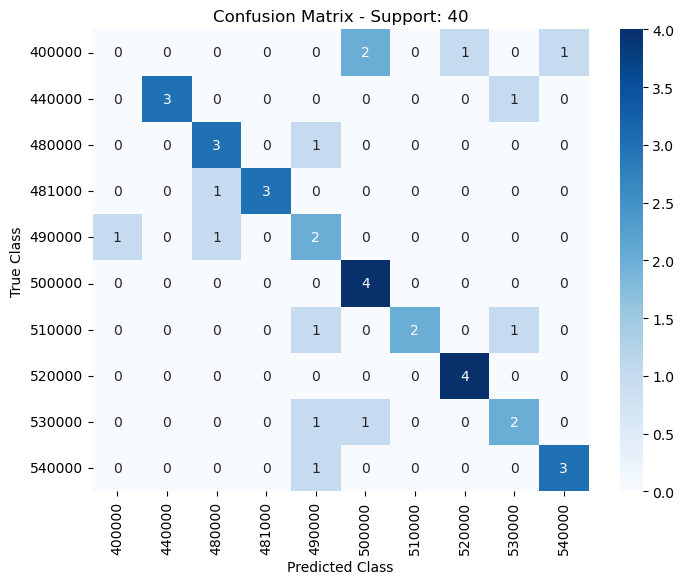

In [22]:
from utils import plot_confusion_matrix

tick_labels = np.unique(y).astype(str)

plot_confusion_matrix(y_test=y_test, y_pred=y_pred, x_labels=tick_labels, y_labels=tick_labels)

### XGB Classifier on sBert ONLY:

In [23]:
from xgboost import XGBClassifier

clf = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Get clear labels:
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

In [24]:
# Evaluation
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

      400000       0.67      0.50      0.57         4
      440000       0.75      0.75      0.75         4
      480000       0.25      0.25      0.25         4
      481000       0.33      0.50      0.40         4
      490000       0.12      0.25      0.17         4
      500000       0.50      0.25      0.33         4
      510000       1.00      0.50      0.67         4
      520000       0.67      1.00      0.80         4
      530000       0.33      0.25      0.29         4
      540000       1.00      0.50      0.67         4

    accuracy                           0.48        40
   macro avg       0.56      0.47      0.49        40
weighted avg       0.56      0.47      0.49        40



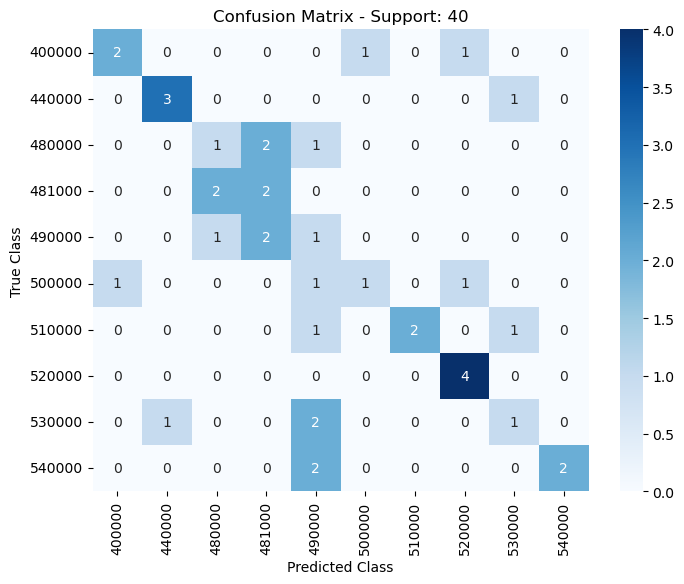

In [25]:
from utils import plot_confusion_matrix

tick_labels = np.unique(y).astype(str)

plot_confusion_matrix(y_test=y_test, y_pred=y_pred, x_labels=tick_labels, y_labels=tick_labels)

### Classification using sBERT and UMAP transformation as data-preparation step

### XBGClassifier on sBert+UMAP:

Apply SentenceTransformer (sBert) and UMAP on the Documents

In [26]:
# proj = get_sbert_umap(documents) <- we cannot use the function here, because the umap-manifold will be build on all data in this case, which is information-leakage.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(embeddings, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
umap_projector = umap.UMAP(random_state=42)
X_train = umap_projector.fit_transform(X_train)
X_test = umap_projector.transform(X_test)

c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [27]:
from xgboost import XGBClassifier

clf = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Get clear labels:
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

In [28]:
# Evaluation
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

      400000       0.00      0.00      0.00         4
      440000       0.00      0.00      0.00         4
      480000       0.40      0.50      0.44         4
      481000       0.50      0.75      0.60         4
      490000       1.00      0.25      0.40         4
      500000       0.25      0.25      0.25         4
      510000       0.29      0.50      0.36         4
      520000       0.33      0.25      0.29         4
      530000       0.33      0.50      0.40         4
      540000       0.50      0.25      0.33         4

    accuracy                           0.33        40
   macro avg       0.36      0.33      0.31        40
weighted avg       0.36      0.33      0.31        40



c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


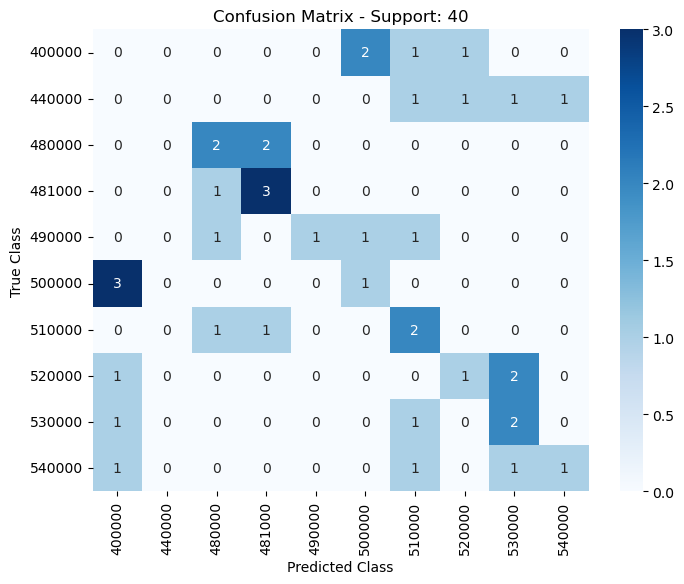

In [29]:
from utils import plot_confusion_matrix

tick_labels = np.unique(y).astype(str)

plot_confusion_matrix(y_test=y_test, y_pred=y_pred, x_labels=tick_labels, y_labels=tick_labels)

### LogisticRegression on sBert+UMAP:

In [30]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

# Get clear labels:
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

      400000       0.40      0.50      0.44         4
      440000       0.00      0.00      0.00         4
      480000       0.67      0.50      0.57         4
      481000       0.50      1.00      0.67         4
      490000       0.00      0.00      0.00         4
      500000       0.00      0.00      0.00         4
      510000       0.29      0.50      0.36         4
      520000       0.20      0.25      0.22         4
      530000       0.25      0.50      0.33         4
      540000       0.00      0.00      0.00         4

    accuracy                           0.33        40
   macro avg       0.23      0.33      0.26        40
weighted avg       0.23      0.33      0.26        40



c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hal9\anaconda3\envs\umap-test\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


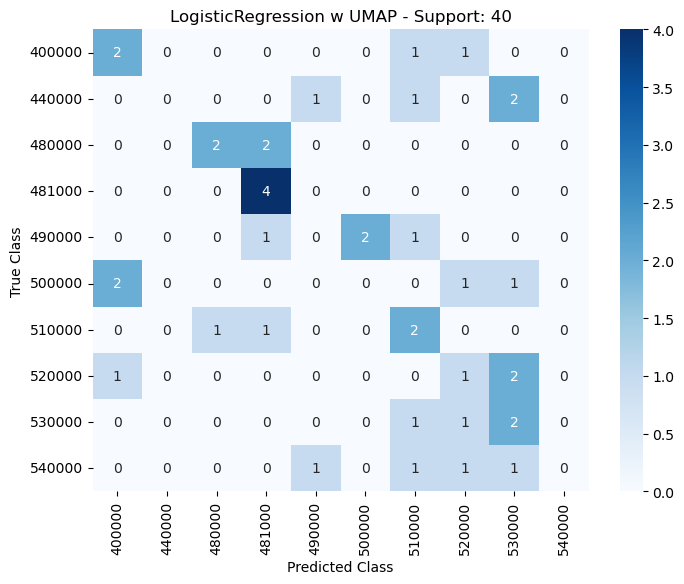

In [32]:
from utils import plot_confusion_matrix

tick_labels = np.unique(y).astype(str)

plot_confusion_matrix(y_test=y_test_labels, y_pred=y_pred_labels, x_labels=tick_labels, y_labels=tick_labels, header_text="LogisticRegression w UMAP")

#### SUMMARY:

Obviously using UMAP projection as a preparation step, makes things worse. <br>
<br>
The reason for this is probably the rather "harsh" projection of SBERT's 384 dimensions down to 2 by UMAP.<br>
Let's try without UMAP on SBERT's text-representation directly...

|Accuracy           |sBert & UMAP |BERT     |
|-------------------|-------------|---------|
|XBG                |0.33         |0.48     |
|Logistic Regression|0.33         |0.65     |